# Punctuation in novels
Inspired by https://medium.com/@neuroecology/punctuation-in-novels-8f316d542ec4#.qwj8e1n8m

In [3]:
import string
import collections
from PIL import Image, ImageDraw
from math import ceil
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

The `string` module has some nice subsets of characters. Does it know about punctuation?

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Getting the punctuation
First, let's just open a text file and read the punctuation. We can also count the number of different punctuation characters in it.

In [5]:
sherlock = open('sherlock-holmes.txt').read()

In [6]:
sherlock_punct = [c for c in sherlock if c in string.punctuation]
print(''.join(sherlock_punct))

..-.......'.........,,,.,,,.,.-'..,-,.,,...,-,,,,,,,,.,,,,.:,,.,,,.-,-(,.-,,,,.,,,,.,,.,,..-...;,,.,,,,.."".",,""".",.,,.,."","",.,""",".,.,'.,,,,,",."";",,..,,,-.,,,-,,,"."",",.""",,.",..,"""""",""""?'""!...,,.--,,,",--.""."",."-,'","...,"""."""..,..",."",'.".""-".".",""""""""""."".",;,"".'''''''''''',''''".",-,.--,.',--',,,",.""."..-''..,,.,,"',..","."",."..',,"","",....""-"".,..,,",,.."".,.,,.-,-.,,.-,,,,,.,,,,.""."",."".",.,."",.,,,.,",.",".""."",";."""."""".",""".",.,,""",.,.."","".,,."";"."",".",-,""",,".."",",.":,,-,."",".,.--.""."!.-!,!-!-!-!,,,,"".-"""""""""".,"""",!""-"""""""""""""",!!""-""""..""""""."""",""....""""".""."".",.""""""""""-,...""""...,.,.,-""""""""."",".",.,,"".""""."","""""""""."".-."'".",,.'"."".""""",-,,.-,",."-'".',.'.,,,.,,,,.,,,,,,,..,-,--,,.',.,-,.,.",",,,."""'.,""'.,,"";.,.'..,..,,,..-,,,.,-.,.",,.,,,,,,""".",'..-,.,,,.,.,.,,,,..,..-,.,,."...,?,,?,.,.,'.,.,,""".",.,,,-.,,.",-,,,..,.,,'','&',..'",,-,,.'.,,.'.,',''",.,.,.'.',''-,.".',...,...,,,.''.''.!'''.

In [7]:
sherlock_counts = collections.Counter(sherlock_punct)
sherlock_counts

Counter({'!': 171,
         '"': 4834,
         '&': 5,
         "'": 1490,
         '(': 5,
         ',': 7053,
         '-': 965,
         '.': 4843,
         '/': 1,
         ':': 56,
         ';': 202,
         '?': 138})

In [8]:
sherlock_ps = pd.Series(sherlock_counts)
sherlock_ps.sort_index(inplace=True)
sherlock_ps

!     171
"    4834
&       5
'    1490
(       5
,    7053
-     965
.    4843
/       1
:      56
;     202
?     138
dtype: int64

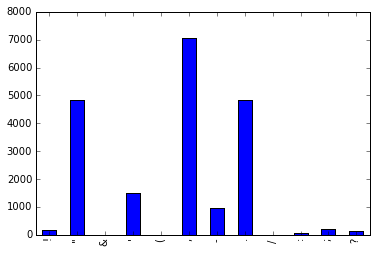

In [9]:
sherlock_ps.plot(kind="bar")

Now we can read and process a novel, wrap that into a function and read some other novels

In [10]:
def punct_summarise(fname):
    content = open(fname).read()
    punct = ''.join(c for c in content if c in string.punctuation)
    counts = collections.Counter(punct)
    return {'punctuation': punct, 'counts': counts}

In [11]:
# Complete Sherlock Holmes
sherlock = punct_summarise('sherlock-holmes.txt')
sherlock['counts']

Counter({'!': 171,
         '"': 4834,
         '&': 5,
         "'": 1490,
         '(': 5,
         ',': 7053,
         '-': 965,
         '.': 4843,
         '/': 1,
         ':': 56,
         ';': 202,
         '?': 138})

In [12]:
wap = punct_summarise('war-and-peace.txt')
wap['counts']

Counter({'!': 3923,
         '"': 17970,
         '#': 1,
         '$': 2,
         '%': 1,
         "'": 7529,
         '(': 670,
         ')': 670,
         '*': 300,
         ',': 39891,
         '-': 6308,
         '.': 30805,
         '/': 29,
         ':': 1014,
         ';': 1145,
         '=': 2,
         '?': 3137,
         '@': 2,
         '[': 1,
         ']': 1})

In [13]:
# Complete works of Shakespeare
shakespeare = punct_summarise('shakespeare.txt')
shakespeare['counts']

Counter({'!': 10815,
         '"': 6,
         '&': 10,
         "'": 27942,
         ',': 82750,
         '-': 4590,
         '.': 36881,
         ':': 10649,
         ';': 17400,
         '?': 10327,
         '[': 19,
         ']': 18})

In [14]:
ulysses = punct_summarise('ulysses.txt')
ulysses['counts']

Counter({'!': 1576,
         '"': 8,
         '%': 3,
         '&': 3,
         "'": 4485,
         '(': 1777,
         ')': 1788,
         '*': 90,
         '+': 2,
         ',': 16349,
         '-': 5037,
         '.': 21361,
         '/': 58,
         ':': 2564,
         ';': 34,
         '?': 2235,
         '_': 4566})

In [15]:
pap = punct_summarise('pride-and-prejudice.txt')
pap['counts']

Counter({'!': 500,
         '"': 3553,
         '#': 1,
         '$': 2,
         '%': 1,
         "'": 748,
         '(': 38,
         ')': 38,
         '*': 58,
         ',': 9280,
         '-': 1193,
         '.': 6396,
         '/': 26,
         ':': 155,
         ';': 1538,
         '?': 462,
         '@': 2,
         '[': 1,
         ']': 2,
         '_': 808})

## Visualising the punctuation
Let's print the punctuation sets side-by-side to compare them.

In [16]:
line_len = 50
for i in range(5,25):
    print(sherlock['punctuation'][line_len*i:line_len*(i+1)], wap['punctuation'][line_len*i:line_len*(i+1)])

.",."",'.".""-".".",""""""""""."".",;,"".''''''''' ,.",","'..?"".,",,",,,.,..?.?"",".",",,"?.",..",",
''',''''".",-,.--,.',--',,,",.""."..-''..,,.,,"',. .,',.',..,,(),:".?.".",",--".?',.',".".,'."."',"."
.","."",."..',,"","",....""-"".,..,,",,.."".,.,,.- .""';.?"(),"'....",,.."?".",.,..",."?,",."...'!",.
,-.,,.-,,,,,.,,,,.""."",."".",.,."",.,,,.,",.","." ."?".",',.,.",,,.",",,"?,",",?":"'....?""..-,'.',.
"."",";."""."""".",""".",.,,""",.,.."","".,,."";". .;,.--'."",,",'."-,.'.",',,,.",",,"',',,.''."'.:.'
"",".",-,""",,".."",",.":,,-,."",".,.--.""."!.-!,! ,,';.,,*.,,.',,,..*.,",""?",,;,'.,,;.,,,",,.",,.-.
-!-!-!,,,,"".-"""""""""".,"""",!""-"""""""""""""", ,,,,.,-----.,,,.,,,,.,,.,,,,,.",",.",,,",.",."-,-,
!!""-""""..""""""."""",""....""""".""."".",."""""" ,.",,,".",",,"?.?",,,."!".,-,,-,,.,-'.,,..-,,,.,,,
""""-,...""""...,.,.,-""""""""."",".",.,,"".""""." .",,,",.,.,.','.:"?."",,.""?"..,.,,'.",".,,.,,,,,,
","""""""""."".-."'".",,.'"."".""""",-,,.-,",."-'" -,,,..,.,'.,,,.-..,.'..,,,.,,.,

Again, now I know it's working, wrap it in a function.

In [17]:
def compare(text1, text2, offset=0, line_len=50):
    for i in range(offset, max(len(text1), len(text2)), line_len):
        t1 = text1[i:i+line_len]
        t1 += (' ' * (line_len - len(t1)))
        print(t1, text2[i:i+line_len])

In [18]:
compare(sherlock['punctuation'], wap['punctuation'])

..-.......'.........,,,.,,,.,.-'..,-,.,,...,-,,,,, ,.,-..::::,[#]:,:******,/:::::-:-:-:-:::::::-:-:",
,,,.,,,,.:,,.,,,.-,-(,.-,,,,.,,,,.,,.,,..-...;,,., ,.,',----,','!?--.",,-,.,,..,,;.,.,,-,:",(),,--.""
,,,.."".",,""".",.,,.,."","",.,""",".,.,'.,,,,,",. !!",.,,,,.,,.,,,,,.",,.',",."??".",?""'?.,".".""'.
"";",,..,,,-.,,,-,,,"."",",.""",,.",..,"""""","""" ."",,",,-,."'!,'?.""?",."?,.",.,,.,,.,,,,,,,,.:",'
?'""!...,,.--,,,",--.""."",."-,'","...,"""."""..,. .',,,.!..!,.,!....,,?...'..,,.?.-,.?!!,....',...!"
.",."",'.".""-".".",""""""""""."".",;,"".''''''''' ,.",","'..?"".,",,",,,.,..?.?"",".",",,"?.",..",",
''',''''".",-,.--,.',--',,,",.""."..-''..,,.,,"',. .,',.',..,,(),:".?.".",",--".?',.',".".,'."."',"."
.","."",."..',,"","",....""-"".,..,,",,.."".,.,,.- .""';.?"(),"'....",,.."?".",.,..",."?,",."...'!",.
,-.,,.-,,,,,.,,,,.""."",."".",.,."",.,,,.,",.","." ."?".",',.,.",,,.",",,"?,",",?":"'....?""..-,'.',.
"."",";."""."""".",""".",.,,""",.,.."","".,,."";". .;,.--'."",,",'."-,.'.",',,,.",

In [19]:
compare(shakespeare['punctuation'], sherlock['punctuation'])

-',,:;!;,,'.;;,-,.,,;;;.,',;,,,.,!,:'?,,.,.,.,:,,' ..-.......'.........,,,.,,,.,.-'..,-,.,,...,-,,,,,
:,,,,'-;,,;',,,,,,,,';'';',,.,,,,,;,,.,?',.,;',,,. ,,,.,,,,.:,,.,,,.-,-(,.-,,,,.,,,,.,,.,,..-...;,,.,
..;,,',.'...,;,,.,.,,;,,',',,',,.,;',,,,.,,,,,.;,, ,,,.."".",,""".",.,,.,."","",.,""",".,.,'.,,,,,",.
-,',,;'.,;,,.',;':.!,,;,.,,',';;',';,,'.?,',',,;,, "";",,..,,,-.,,,-,,,"."",",.""",,.",..,"""""",""""
,,,.,;,--,.,,;,;,.,,',,,,.,:,?,:,..,!??,.!,,;,,!'. ?'""!...,,.--,,,",--.""."",."-,'","...,"""."""..,.
,!'.,!'.,,,,,,,,,,,,,'!':.',:,,,,'.:,,.,,:;.,,,.', .",."",'.".""-".".",""""""""""."".",;,"".'''''''''
'-,,,,,.!',,',,',,,,,-.,.,.!??.:!-!'',,.:!,,,;,,'. ''',''''".",-,.--,.',--',,,",.""."..-''..,,.,,"',.
,,'.!,'.,.!.,.!.,.,.,,.,:!:;.,':!,,'.,.-,',,',''., .","."",."..',,"","",....""-"".,..,,",,.."".,.,,.-
-,,;,.,:;!,:'.,.,:,!'!;?;;,',,.,,.,,'.';:,'.,';'', ,-.,,.-,,,,,.,,,,.""."",."".",.,."",.,,,.,",.","."
';,',.':-;,:,.?,,.',,,-.,,;,.,,,.,,.,,.,..,..,.,,. "."",";."""."""".",""".",.,,"""

In [20]:
compare(sherlock['punctuation'], ulysses['punctuation'])

..-.......'.........,,,.,,,.,.-'..,-,.,,...,-,,,,, ----,,.,,.:--__.,:--,!,!.,.,,,.,,,,,..--!.':--,,:.
,,,.,,,,.:,,.,,,.-,-(,.-,,,,.,,,,.,,.,,..-...;,,., ,.,...,.,,...--,,..,?,.,..--!.,!,.,,,.'.--:,.,'?..
,,,.."".",,""".",.,,.,."","",.,""",".,.,'.,,,,,",. ?,,:--?!,.--,,.--,?--?.--,'?..'.,!..,,.'.,:,-..--,
"";",,..,,,-.,,,-,,,"."",",.""",,.",..,"""""","""" .?--!.?--,.'..',....--!.,',:--...,,:--'!:.,'?,.--!
?'""!...,,.--,,,",--.""."",."-,'","...,"""."""..,. .':?..__.,,!.._!_!....--!.'.--,.''.--,.--,,,,.'...
.",."",'.".""-".".",""""""""""."".",;,"".''''''''' .....--!.,!,,.,,-.,,.,,,,,,,.....--,!..?--,..--,..
''',''''".",-,.--,.',--',,,",.""."..-''..,,.,,"',. .,.'.',.'.--,.'.--',..'...--,,...'.!...--,,!,...?.
.","."",."..',,"","",....""-"".,..,,",,.."".,.,,.- .--',.....,'.--,.!,:--.-.',.--',,?.....--!.''..,,.
,-.,,.-,,,,,.,,,,.""."",."".",.,."",.,,,.,",.","." .'..--.'.'???''.'.:,.,!,!!,,'.'.'!'!.,,',........-
"."",";."""."""".",""".",.,,""",.,.."","".,,."";". -,.'.--?..'.?,..--?.--,?.'.'.,.

In [21]:
compare(sherlock['punctuation'], pap['punctuation'])

..-.......'.........,,,.,,,.,.-'..,-,.,,...,-,,,,, ,.,-..:::,[#]:,:,]::******,,.,,.".,","?"..",";".,.
,,,.,,,,.:,,.,,,.-,-(,.-,,,,.,,,,.,,.,,..-...;,,., ".."?"."__,.".",,,.;,,.;,.""?"".""?""!,,!;.!""??""
,,,.."".",,""".",.,,.,."","",.,""",".,.,'.,,,,,",. .,","!.""?""!,!__,."".,,,,.."",.__,.-,."",."",,.."
"";",,..,,,-.,,,-,,,"."",",.""",,.",..,"""""","""" ",.""..,,,,.,__.""-,..;;."".;,-.__."",";";."".,__?
?'""!...,,.--,,,",--.""."",."-,'","...,"""."""..,. .."",...."",."",."",,."",,,.".,,,,--.__.,,.,.;....
.",."",'.".""-".".",""""""""""."".",;,"".''''''''' ,;..,:".,.""__.,","."",,",",..""...,,."",".;".".,,
''',''''".",-,.--,.',--',,,",.""."..-''..,,.,,"',. ,."',,'!.."",";"."",".",?""-."",,",".;,."",,,.__."
.","."",."..',,"","",....""-"".,..,,",,.."".,.,,.- ",.,,;?"".'..__;,.;,,,,."..,",!""?".",,?__.,?,,.",
,-.,,.-,,,,,.,,,,.""."",."".",.,."",.,,,.,",.","." .",",".."".,"."__;?.;,.";.;,,.",.!..,!,,."",,,".;,
"."",";."""."""".",""".",.,,""",.,.."","".,,."";". ,,.",!",.";,,.,,;,.,,__,..""!",

### Compare more than two texts at a time

In [22]:
def compare_many(*texts, offset=0, line_len=100, gap=' '):
    def padded_segment(text, start, length):
        segment = text[start:start+segment_len]
        segment += (' ' * (segment_len - len(segment)))
        return segment
    segment_len = line_len // len(texts) - len(gap)
    max_len = max(len(text) for text in texts)
    for i in range(offset, max_len, line_len):
        segments = [padded_segment(text, i, segment_len) for text in texts]
        print(gap.join(segments))

In [23]:
compare_many(sherlock['punctuation'], pap['punctuation'], wap['punctuation'])

..-.......'.........,,,.,,,.,.-' ,.,-..:::,[#]:,:,]::******,,.,,. ,.,-..::::,[#]:,:******,/:::::-:
,,,.."".",,""".",.,,.,."","",.," .,","!.""?""!,!__,."".,,,,.."",. !!",.,,,,.,,.,,,,,.",,.',",."??"
?'""!...,,.--,,,",--.""."",."-,' .."",...."",."",."",,."",,,.".,, .',,,.!..!,.,!....,,?...'..,,.?.
''',''''".",-,.--,.',--',,,",."" ,."',,'!.."",";"."",".",?""-."", .,',.',..,,(),:".?.".",",--".?',
,-.,,.-,,,,,.,,,,.""."",."".",., .",",".."".,"."__;?.;,.";.;,,.", ."?".",',.,.",,,.",",,"?,",",?":
"",".",-,""",,".."",",.":,,-,."" --,,;,-,...,,,,,.!;.'.",".,",.". ,,';.,,*.,,.',,,..*.,",""?",,;,'
!!""-""""..""""""."""",""....""" ;,,..;,,,..!..,,,..,,..,.,,;,.., ,.",,,".",",,"?.?",,,."!".,-,,-,
","""""""""."".-."'".",,.'".""." ,;,,.....,.,.'.;,.,,,,...;.';."! -,,,..,.,'.,,,.-..,.'..,,,.,,.,,
"'.,""'.,,"";.,.'..,..,,,..-,,,. ..,,,..",","__;,,.!,,!!,,-..",,. ,,,,----.,.,,."!";.",,",...,,,,.
,,""".",.,,,-.,,.",-,,,..,.,,'', .__,!--.--',--.',,?.""--..,;.",; -.-,,,,..,,';,',,'.,.,;."!"."!",
',,,,''"-,

In [24]:
compare_many(sherlock['punctuation'], pap['punctuation'], wap['punctuation'], gap=' <> ')

..-.......'.........,,,.,,,., <> ,.,-..:::,[#]:,:,]::******,,. <> ,.,-..::::,[#]:,:******,/::::
,,,.."".",,""".",.,,.,."","", <> .,","!.""?""!,!__,."".,,,,.." <> !!",.,,,,.,,.,,,,,.",,.',",."
?'""!...,,.--,,,",--.""."",." <> .."",...."",."",."",,."",,,." <> .',,,.!..!,.,!....,,?...'..,,
''',''''".",-,.--,.',--',,,", <> ,."',,'!.."",";"."",".",?""-. <> .,',.',..,,(),:".?.".",",--".
,-.,,.-,,,,,.,,,,.""."",.""." <> .",",".."".,"."__;?.;,.";.;,, <> ."?".",',.,.",,,.",",,"?,",",
"",".",-,""",,".."",",.":,,-, <> --,,;,-,...,,,,,.!;.'.",".,", <> ,,';.,,*.,,.',,,..*.,",""?",,
!!""-""""..""""""."""","".... <> ;,,..;,,,..!..,,,..,,..,.,,;, <> ,.",,,".",",,"?.?",,,."!".,-,
","""""""""."".-."'".",,.'"." <> ,;,,.....,.,.'.;,.,,,,...;.'; <> -,,,..,.,'.,,,.-..,.'..,,,.,,
"'.,""'.,,"";.,.'..,..,,,..-, <> ..,,,..",","__;,,.!,,!!,,-.." <> ,,,,----.,.,,."!";.",,",...,,
,,""".",.,,,-.,,.",-,,,..,.,, <> .__,!--.--',--.',,?.""--..,;. <> -.-,,,,..,,';,',,'.,.,;."!"."
',,,,''"-,,,,,,.,,.,.,,.,-""" <> -,..,..

## Making images
The text versions are fine, but let's turn the punctuation into images, with a coloured square for each punctuation character.

Start with just trying to get something out

In [25]:
# Periods and question marks and exclamation marks are red. 
# Commas and quotation marks are green. 
# Semicolons and colons are blue. 
colours = {'.': (255, 0, 0), '?': (255, 0, 0), '!': (255, 0, 0),
           ',': (0, 255, 0), '"': (0, 255, 0), "'": (0, 255, 0),
           ':': (0, 0, 255),  ';': (0, 0, 255),
           'unknown': (128, 128, 128)}
max_x = 1000
max_y = 1000
block_size = 4
text = sherlock['punctuation']
img = Image.new('RGBA', (max_x, max_y))
draw = ImageDraw.Draw(img)
x = 0
y = 0
i = 0
# for i in range(100):
#     if text[i] in colours:
#         this_colour = colours[text[i]]
for p in text:
    if p in colours:
        this_colour = colours[p]
    else:
        this_colour = colours['unknown']
    draw.rectangle((x, y, x+block_size, y+block_size), fill=this_colour)
    x += block_size
    if x >= max_x:
        x = 0
        y += block_size
img.save('test.png')

The image: 
![alt text](test.png)


Rearrange the colours to match the "heatmaps" in [the original](https://medium.com/@neuroecology/punctuation-in-novels-8f316d542ec4#.qwj8e1n8m), and wrap the whole thing in a function.

In [26]:
# Periods and question marks and exclamation marks are red. 
# Commas and quotation marks are -green- blue. 
# Semicolons and colons are -blue- green. 
def make_image(text, block_size=4, width=1000, colours=None):
    default_colours = {'.': (255, 0, 0), '?': (255, 0, 0), '!': (255, 0, 0),
           ',': (0, 0, 255), '"': (0, 0, 255), "'": (0, 0, 255),
           ':': (0, 255, 0),  ';': (0, 255, 0),
           'unknown': (128, 128, 128)}
    if not colours:
        colours = {}
    use_colours = default_colours.copy()
    use_colours.update(colours)
    height = ceil((len(text) * block_size) / width)
    img = Image.new('RGBA', (width, height))
    draw = ImageDraw.Draw(img)
    x = 0
    y = 0
    for p in text:
        if p in use_colours:
            this_colour = use_colours[p]
        else:
            this_colour = use_colours['unknown']
        draw.rectangle((x, y, x+block_size, y+block_size), fill=this_colour)
        x += block_size
        if x >= width:
            x = 0
            y += block_size
    return img

In [27]:
i = make_image(sherlock['punctuation'])
i.save('sherlock.png')

In [28]:
i = make_image(wap['punctuation'], block_size=6, colours={'-': (255,255,255)})
i.save('wap.png')

In [29]:
i = make_image(wap['punctuation'], colours={'-': (255,255,255), '(': (255, 165, 0), ')': (255, 165, 0)})
i.save('wap.png')

In [30]:
i = make_image(shakespeare['punctuation'])
i.save('shakespeare.png')

In [33]:
i = make_image(ulysses['punctuation'], colours={'-': (255,255,255), '(': (255, 165, 0), ')': (255, 165, 0)})
i.save('ulysses.png')

In [32]:
i = make_image(pap['punctuation'])
i.save('pap.png')

Sherlock: 
![alt text](sherlock.png)

War and Peace:
![alt text](wap.png)

Shakespeare:
![alt text](shakespeare.png)

Ulysses:
![alt text](ulysses.png)

Pride and Prejudice:
![alt text](pap.png)